In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 143
NUM_SAMPLES = 50

In [2]:
np.random.seed(SEED)

In [3]:
def generate_synthetic_data(n_samples):
    """generate dummy data for linear regression"""
    X = np.array(range(n_samples))
    random_noise = np.random.uniform(-10, 20, size=n_samples)
    y = 3.5*X + random_noise
    return X, y

In [4]:
X, y = generate_synthetic_data(NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         12.13264885]
 [ 1.          3.69864222]
 [ 2.         11.04270303]
 [ 3.         13.21814047]
 [ 4.         21.04958841]]


In [5]:
df = pd.DataFrame(data, columns = ["X", "y"])
print(df.head())
X = df[["X"]].values
y = df[["y"]].values

     X          y
0  0.0  12.132649
1  1.0   3.698642
2  2.0  11.042703
3  3.0  13.218140
4  4.0  21.049588


Text(0.5, 0, 'X')

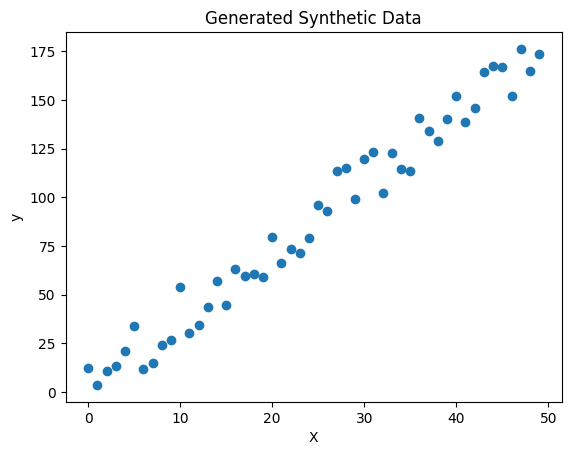

In [6]:
plt.scatter(X, y)
plt.title("Generated Synthetic Data")
plt.ylabel("y")
plt.xlabel("X")

In [7]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [8]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


In [9]:
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [10]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]

X_val = X[val_start:val_end]
y_val = y[val_start:val_end]

X_test = X[test_start:]
y_test = y[test_start:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (35, 1), y_train shape: (35, 1)
X_val shape: (7, 1), y_val shape: (7, 1)
X_test shape: (8, 1), y_test shape: (8, 1)


In [11]:
def standardize_data(data):
    mu = np.mean(data)
    sigma = np.std(data)
    return (data - mu)/sigma

In [12]:
X_mu = np.mean(X)
X_std = np.std(X)

y_mu = np.mean(y)
y_std = np.std(y)

In [13]:
X_train = standardize_data(X_train)
y_train = standardize_data(y_train)

X_val = standardize_data(X_val)
y_val = standardize_data(y_val)

X_test = standardize_data(X_test)
y_test = standardize_data(y_test)

In [14]:
print(f"Mu X_train: {round(np.mean(X_train, axis=0)[0], 2)}, Sigma X_train: {round(np.std(X_train, axis=0)[0], 2)}")
print(f"Mu y_train: {round(np.mean(y_train, axis=0)[0], 2)}, Sigma y_train: {round(np.std(y_train, axis=0)[0], 2)}")

print(f"Mu X_val: {round(np.mean(X_val, axis=0)[0], 2)}, Sigma X_val: {round(np.std(X_val, axis=0)[0], 2)}")
print(f"Mu y_val: {round(np.mean(y_val, axis=0)[0], 2)}, Sigma y_val: {round(np.std(y_val, axis=0)[0], 2)}")

print(f"Mu X_test: {round(np.mean(X_test, axis=0)[0], 2)}, Sigma X_test: {round(np.std(X_test, axis=0)[0], 2)}")
print(f"Mu y_test: {round(np.mean(y_test, axis=0)[0], 2)}, Sigma y_test: {round(np.std(y_test, axis=0)[0], 2)}")

Mu X_train: 0.0, Sigma X_train: 1.0
Mu y_train: -0.0, Sigma y_train: 1.0
Mu X_val: -0.0, Sigma X_val: 1.0
Mu y_val: -0.0, Sigma y_val: 1.0
Mu X_test: 0.0, Sigma X_test: 1.0
Mu y_test: 0.0, Sigma y_test: 1.0


In [15]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [16]:
W = 0.01*np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(f"W: shape: {W.shape}")
print(f"b: shape: {b.shape}")

W: shape: (1, 1)
b: shape: (1, 1)


In [17]:
y_pred = np.dot(X_train, W) + b
print(f"y_pred shape: {y_pred.shape}")

y_pred shape: (35, 1)


In [18]:
# loss
N = len(y_train)
loss = (1/N)*np.sum((y_train - y_pred)**2)
print(f"Training Loss: {loss:.2f}")

Training Loss: 1.02


In [19]:
dW = -(2/N)*np.sum((y_train - y_pred)*X_train)
db = -(2/N)*np.sum((y_train - y_pred)*1)

In [20]:
LEARNING_RATE = 1e-1

In [21]:
W = W - LEARNING_RATE*dW
b = b - LEARNING_RATE*db

In [22]:
NUM_EPOCHS = 100

In [23]:
W = 0.01* np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

for epoch_num in range(NUM_EPOCHS):
    
    y_pred = np.dot(X_train, W) + b

    loss = (1/len(y_train))*np.sum((y_train - y_pred)**2)

    if epoch_num%10 == 0:
        print(f"Epoch {epoch_num}: Loss: {loss:.3f}")

    dW = -(2/len(y_train))*np.sum((y_train - y_pred)*X_train)
    db = -(2/len(y_train))*np.sum((y_train - y_pred)*1)

    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db


Epoch 0: Loss: 0.984
Epoch 10: Loss: 0.040
Epoch 20: Loss: 0.029
Epoch 30: Loss: 0.029
Epoch 40: Loss: 0.029
Epoch 50: Loss: 0.029
Epoch 60: Loss: 0.029
Epoch 70: Loss: 0.029
Epoch 80: Loss: 0.029
Epoch 90: Loss: 0.029


In [24]:
pred_train = W*X_train + b
pred_val = W*X_val + b
pred_test = W*X_test + b

In [25]:
train_mse = np.mean((y_train - pred_train)**2)
val_mse = np.mean((y_val - pred_val)**2)
test_mse = np.mean((y_test - pred_test)**2)

print(f"Train MSE: {train_mse:.3f}, Val MSE: {val_mse:.3f}, Test MSE: {test_mse:.3f}")

Train MSE: 0.029, Val MSE: 0.023, Test MSE: 0.030


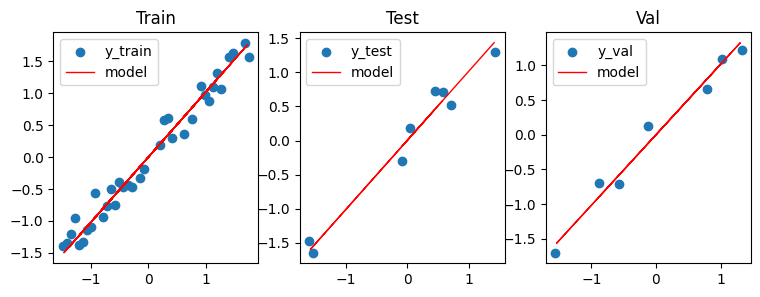

In [26]:
plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.scatter(X_train, y_train, label="y_train")
plt.plot(pred_train, X_train, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Train")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X_val, y_val, label="y_val")
plt.plot(pred_val, X_val, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Val")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X_test, y_test, label="y_test")
plt.plot(pred_test, X_test, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Test")
plt.legend()

plt.show()

In [27]:
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mu - np.sum(W_unscaled*X_mu)
print("Initial Model -> y = 3.5X + 0.0")
print(f"Final Model -> y = {W_unscaled[0][0]:.3f}X + {b_unscaled[0]:.3f}")

Initial Model -> y = 3.5X + 0.0
Final Model -> y = 3.569X + 0.759


### Pytorch

In [28]:
import torch

In [29]:
torch.manual_seed(143)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [45]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)

In [46]:
print(f"Train X shape: {X_train.shape}, Train y shape: {y_train.shape}")
print(f"Val X shape: {X_val.shape}, Val y shape: {y_val.shape}")
print(f"Test X shape: {X_test.shape}, Test y shape: {y_test.shape}")

Train X shape: (35, 1), Train y shape: (35, 1)
Val X shape: (7, 1), Val y shape: (7, 1)
Test X shape: (8, 1), Test y shape: (8, 1)


In [34]:
from sklearn.preprocessing import StandardScaler

In [48]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [49]:
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

y_train = y_scaler.transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)

In [50]:
print(f"Test X Mu: {np.mean(X_test, axis=0)[0]:.2f}, Test X std: {np.std(X_test, axis=0)[0]:.2f}")
print(f"Test  Mu: {np.mean(y_test, axis=0)[0]:.2f}, Test y std: {np.std(y_test, axis=0)[0]:.2f}")

Test X Mu: 0.03, Test X std: 1.05
Test  Mu: 0.01, Test y std: 1.07


In [51]:
from torch import nn

In [52]:
N = 3
x = torch.randn(N, INPUT_DIM)
print (x.shape)
print (x.numpy())

torch.Size([3, 1])
[[-0.5737771]
 [ 1.3436034]
 [-1.5592476]]


In [53]:
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print (m)
print (f"weights ({m.weight.shape}): {m.weight[0][0]:.2f}")
print (f"bias ({m.bias.shape}): {m.bias[0]:.2f}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): -0.50
bias (torch.Size([1])): 0.96


In [54]:
z = m(x) 
print (z.shape)
print (z.detach().numpy())

torch.Size([3, 1])
[[1.2507483 ]
 [0.28704643]
 [1.7460594 ]]


In [57]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        
    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [58]:
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print (model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [59]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true =  torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print("Loss: ", loss.numpy())

Loss:  0.75


In [60]:
from torch.optim import Adam

In [61]:
optimizer = Adam(model.parameters(), lr=LEARNING_RATE) 

In [62]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [65]:
for epoch_num in range(NUM_EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch_num%10==0:
        print(f"Epoch: {epoch_num} | Loss: {loss:.2f}")

Epoch: 0 | Loss: 0.03
Epoch: 10 | Loss: 0.03
Epoch: 20 | Loss: 0.03
Epoch: 30 | Loss: 0.03
Epoch: 40 | Loss: 0.03
Epoch: 50 | Loss: 0.03
Epoch: 60 | Loss: 0.03
Epoch: 70 | Loss: 0.03
Epoch: 80 | Loss: 0.03
Epoch: 90 | Loss: 0.03


In [66]:
pred_train = model(X_train)
pred_test = model(X_test)

In [67]:
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")

train_error: 0.03
test_error: 0.02


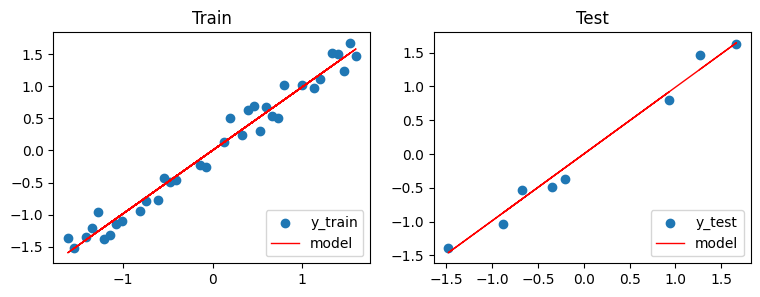

In [68]:
plt.figure(figsize=(9,3))

plt.subplot(1, 2, 1)

plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")
plt.title("Train")

plt.subplot(1, 2, 2)

plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")
plt.title("Test")

plt.show()

In [70]:
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))

In [72]:
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled*X_scaler.mean_)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}") 

[actual] y = 3.5X + noise
[model] y_hat = 3.6X + 0.0


In [73]:
L2_LAMBDA = 1e-2

In [74]:
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)

In [75]:
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA) 

In [76]:
for epoch in range(NUM_EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%20==0: 
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.21
Epoch: 20 | loss: 0.03
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.03
Epoch: 80 | loss: 0.03


In [77]:
pred_train = model(X_train)
pred_test = model(X_test)

In [78]:
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")

train_error: 0.03
test_error: 0.02
